In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory=False)
df.shape

(426545, 151)

**변수(컬럼) 살펴보기**

In [25]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426545 entries, 0 to 426544
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 491.4+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


결측치(Missing values) 확인

결측치가 많다면 적절히 처리(drop, 평균 대체, 0 대체, 모드 대체 등) 방법 고민

In [26]:
df.isnull().sum().sort_values(ascending=False)

,0
member_id,426545
desc,426500
sec_app_mths_since_last_major_derog,426252
sec_app_revol_util,425688
sec_app_fico_range_low,425673
...,...
pymnt_plan,2
url,2
funded_amnt,2
loan_amnt,2


일정 이상 결측치가 발생하면 그 column을 drop하고 남은 columns 확인

In [27]:
df = df.dropna(thresh=100000, axis=1)

In [28]:
df.isnull().sum().sort_values(ascending=False)

,0
mths_since_recent_bc_dlq,316888
mths_since_last_major_derog,302583
mths_since_recent_revol_delinq,273258
mths_since_last_delinq,207032
mths_since_recent_inq,45277
...,...
annual_inc,2
loan_status,2
issue_d,2
pymnt_plan,2


결측치가 존재하는 행 제거

In [29]:
df = df.dropna()

결측치 존재하는 행 제거 결과 211567개의 행 존재

In [30]:
df.isnull().sum().sort_values(ascending=False)
df.shape

(52605, 97)

In [31]:
df.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
426457,130430123,14000.0,14000.0,14000.0,60 months,9.92,296.91,B,B2,Training Manager,...,50.0,0.0,0.0,109207.0,75994.0,11900.0,90307.0,N,Cash,N
426494,130532951,11000.0,11000.0,11000.0,36 months,6.71,338.20,A,A3,nurse administrator,...,0.0,0.0,0.0,224700.0,8818.0,29700.0,0.0,N,Cash,N
426500,130796704,12000.0,12000.0,12000.0,60 months,17.47,301.28,D,D1,Realtor,...,40.0,1.0,0.0,13700.0,6567.0,12400.0,0.0,N,Cash,N
426525,130828586,18000.0,18000.0,18000.0,60 months,18.45,461.50,D,D2,LIAISON,...,25.0,0.0,0.0,209024.0,25267.0,26000.0,17524.0,N,Cash,N
426543,130817943,18000.0,18000.0,18000.0,36 months,16.01,632.92,C,C5,Practice Manager,...,25.0,0.0,0.0,76300.0,30219.0,4100.0,42600.0,N,Cash,N


In [32]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,52605.000000,52605.000000,52605.000000,52605.000000,52605.000000,5.260500e+04,52605.000000,52605.000000,52605.000000,52605.000000,...,52605.000000,52605.000000,52605.000000,52605.000000,52605.000000,52605.000000,5.260500e+04,5.260500e+04,52605.000000,5.260500e+04
mean,14300.657257,14300.657257,14294.242943,13.230838,420.831395,8.186944e+04,18.149574,0.812090,678.708678,682.708678,...,0.295827,2.642391,83.762036,44.460688,0.143713,0.084745,1.758286e+05,5.183654e+04,14581.172873,4.761471e+04
std,8158.518354,8158.518354,8154.834760,4.230537,236.757093,8.071428e+04,8.662822,1.497822,17.751356,17.751356,...,0.879847,2.022874,10.422483,35.769486,0.436909,0.474428,1.747715e+05,4.852164e+04,13800.943215,4.566310e+04
min,1000.000000,1000.000000,1000.000000,5.310000,30.650000,5.000000e+03,0.000000,0.000000,660.000000,664.000000,...,0.000000,0.000000,7.700000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,100.000000,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,9.990000,254.910000,5.000000e+04,11.780000,0.000000,665.000000,669.000000,...,0.000000,1.000000,78.300000,6.700000,0.000000,0.000000,5.270000e+04,2.264000e+04,5900.000000,1.923000e+04
50%,12000.000000,12000.000000,12000.000000,12.690000,365.080000,7.000000e+04,17.430000,0.000000,675.000000,679.000000,...,0.000000,2.000000,85.700000,42.900000,0.000000,0.000000,1.132500e+05,3.909000e+04,10600.000000,3.660900e+04
75%,20000.000000,20000.000000,20000.000000,15.990000,541.650000,9.700000e+04,23.910000,1.000000,690.000000,694.000000,...,0.000000,4.000000,91.400000,75.000000,0.000000,0.000000,2.550840e+05,6.473300e+04,18800.000000,6.268600e+04
max,40000.000000,40000.000000,40000.000000,30.790000,1445.460000,8.500021e+06,380.530000,27.000000,825.000000,829.000000,...,26.000000,25.000000,100.000000,100.000000,11.000000,22.000000,9.999999e+06,1.684313e+06,373100.000000,2.101913e+06


target 변수로 사용할 loan_status의 고유값들 확인

값별 개수 확인 (value_counts())

샘플 데이터 확인

In [33]:
print(df['loan_status'].unique())  # 고유 값 출력
print(df['loan_status'].value_counts())  # 값별 개수 출력
df['loan_status'].head(10)  # 상위 10개 출력

['Fully Paid' 'Charged Off' 'Current' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)']
loan_status
Fully Paid            36688
Charged Off           10552
Current                5043
Late (31-120 days)      198
In Grace Period          74
Late (16-30 days)        50
Name: count, dtype: int64


,loan_status
0,Fully Paid
21,Fully Paid
30,Charged Off
32,Fully Paid
34,Current
42,Current
52,Current
57,Fully Paid
83,Charged Off
88,Fully Paid


**타겟 변수를 정의**

Lending Club 예시에서는 loan_status 컬럼이 “Fully Paid(정상 상환)”, “Charged Off(연체/부실)” 등을 나타내므로, 이 값을 이진 분류용 타겟으로 사용 가능.

“Charged Off”이면 연체(1), “Fully Paid”이면 정상(0) 등으로 변환하려고 했는데 더 많은 case가 있어서 fully paid와 changed off만 두고 할지, 아니면 세 가지 케이스를 나눌지 고민 필요

In [34]:
# 1) 'Fully Paid' 또는 'Charged Off'만 남기고 나머지 행은 제외
df = df[(df['loan_status'] == "Fully Paid") | (df['loan_status'] == "Charged Off")].copy()

# 2) 새 컬럼 'target'을 생성: Charged Off -> 1, Fully Paid -> 0
df['target'] = df['loan_status'].apply(lambda x: 1 if x == "Charged Off" else 0)

# 확인
print(df['loan_status'].value_counts())
print(df['target'].value_counts())

loan_status
Fully Paid     36688
Charged Off    10552
Name: count, dtype: int64
target
0    36688
1    10552
Name: count, dtype: int64


대출 금액(loan_amnt), 이자율(int_rate), 신용등급(grade), 연소득(annual_inc) 등의 분포를 대략적으로 파악.

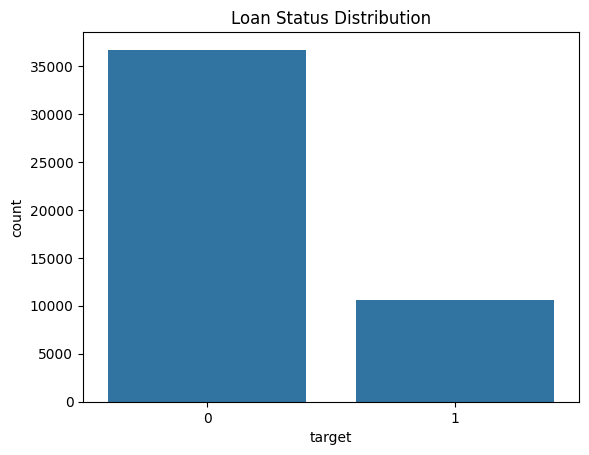

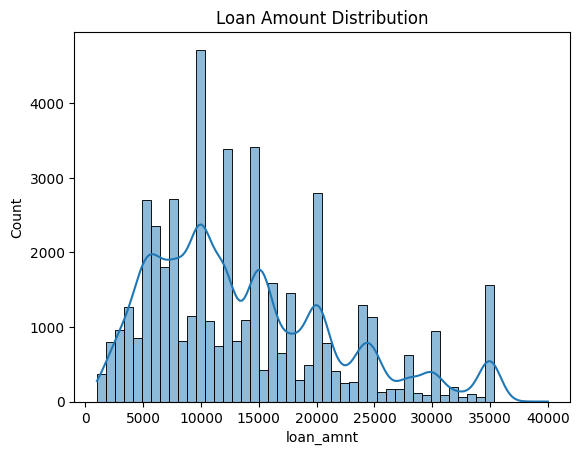

In [35]:
# 타겟 분포 확인
sns.countplot(x='target', data=df)
plt.title("Loan Status Distribution")
plt.show()

# 숫자형 변수의 분포
sns.histplot(df['loan_amnt'], bins=50, kde=True)
plt.title("Loan Amount Distribution")
plt.show()

# **데이터 전처리 및 특징 공학(Feature Engineering)**

**컬럼 선택 및 변환**

분석에 의미 있는 컬럼만 추출

예: 대출금액, 금리, 신용등급, 직업, 연소득, 부채비율, 대출기간, 연체기록 등.
필요 없는 컬럼(e.g. ID, URL, 문제 해결과 무관한 날짜 등)은 제거.

결측이 많았던 employment_length는 drop 되었을 수도 있으므로 컬럼이 없으면 자동으로 빼고 복사를 진행

In [36]:
# 원래 선택하려고 했던 컬럼 리스트
selected_columns = [
    'loan_amnt', 'int_rate', 'grade', 'annual_inc', 'employment_length',
    'home_ownership', 'purpose', 'dti', 'delinq_2yrs', 'target'
]

# 실제 df에 존재하는 컬럼만 걸러내기
existing_columns = [col for col in selected_columns if col in df.columns]

# 데이터프레임에서 해당 컬럼들만 복사
df_selected = df[existing_columns].copy()

# 확인용 출력
print("최종 선택된 컬럼:", existing_columns)
print("df_selected.shape:", df_selected.shape)

최종 선택된 컬럼: ['loan_amnt', 'int_rate', 'grade', 'annual_inc', 'home_ownership', 'purpose', 'dti', 'delinq_2yrs', 'target']
df_selected.shape: (47240, 9)


**범주형 변수 인코딩**

‘grade’(A, B, C 등), ‘home_ownership’(OWN, RENT, MORTGAGE 등), ‘purpose’(‘credit_card’, ‘debt_consolidation’ 등) 등은 **범주형(Categorical)**이므로 원-핫 인코딩(One-Hot Encoding) 또는 라벨 인코딩(Label Encoding)을 적용.

In [37]:
df_encoded = pd.get_dummies(df_selected, columns=['grade','home_ownership','purpose'])

**Scaling**

연소득(annual_inc)처럼 값의 범위가 매우 큰 변수는 로그 변환 혹은 MinMaxScaler/StandardScaler 등을 적용할 수 있음.

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded['loan_amnt_scaled'] = scaler.fit_transform(df_encoded[['loan_amnt']])

# 모델링 (Machine Learning)

**라이브러리 임포트**

In [39]:
# 기본 파이썬 라이브러리
import pandas as pd
import numpy as np

# 머신러닝 관련
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,
                             roc_auc_score,
                             confusion_matrix,
                             classification_report)

# 옵션: 경고 무시(불필요한 워닝 억제)
import warnings
warnings.filterwarnings('ignore')

**데이터 분리 (Train/Test Split)**

X: 모델의 입력(feature) 데이터로, target 열(종속 변수)을 제외한 모든 데이터를 포함

drop('target', axis=1): target 열을 제거하여 독립 변수 데이터만 남김

y: 모델의 출력(label) 데이터로, target 열을 사용

전체 데이터의 20%를 테스트 데이터로 사용하고, 나머지 80%는 훈련 데이터로 사용

stratify=y로 타겟 비율에 맞게 샘플링.

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (37792, 28)
X_test shape: (9448, 28)


**로지스틱 회귀(Logistic Regression) 모델**

max_iter=1000 : 데이터 규모가 큰 경우, 기본값(100)으로는 수렴 경고가 뜰 수 있으므로 늘려줍니다.

predict_proba() : (N, 2) 형태 확률을 반환 → 두 번째 열([:,1])이 클래스 1의 예측 확률.

In [45]:
model_lr = LogisticRegression(max_iter=1000)  # 기본 max_iter=100으로는 경고 발생 가능성
model_lr.fit(X_train, y_train)

# 예측
y_pred_lr = model_lr.predict(X_test)
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]  # 클래스 1일 확률

# 성능 평가
acc_lr = accuracy_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_pred_proba_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("=== Logistic Regression 결과 ===")
print("Accuracy:", acc_lr)
print("ROC-AUC:", roc_lr)
print("Confusion Matrix:\n", cm_lr)
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

=== Logistic Regression 결과 ===
Accuracy: 0.7823878069432684
ROC-AUC: 0.6929958832746244
Confusion Matrix:
 [[7167  171]
 [1885  225]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.87      7338
           1       0.57      0.11      0.18      2110

    accuracy                           0.78      9448
   macro avg       0.68      0.54      0.53      9448
weighted avg       0.74      0.78      0.72      9448



**Decision Tree 모델**

max_depth=5 : 트리 깊이를 제한해 과적합 방지(하이퍼파라미터).

실제 적용 시에는 max_depth, min_samples_split 등 여러 파라미터를 조정해볼 수 있습니다.

**파라미터 후보 설정**

max_depth: 트리의 최대 깊이(깊어질수록 복잡, 과적합 가능성↑)

min_samples_split: 내부 노드를 분할하기 위한 최소 샘플 수

min_samples_leaf: 리프 노드가 되기 위한 최소 샘플 수

criterion: 분할 시 불순도 측정 방법('gini' 또는 'entropy')

In [46]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']  # 불순도 측정 기준
}

GridSearchCV 설정

In [47]:
dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring='roc_auc',  # ROC-AUC 기반으로 최적 파라미터 찾기
    cv=5,               # 5-Fold 교차검증
    n_jobs=-1           # CPU 병렬처리(최대한 활용)
)

grid_dt.fit(X_train, y_train)

print("\n=== GridSearchCV: Decision Tree ===")
print("Best Params:", grid_dt.best_params_)
print("Best CV Score (ROC-AUC):", grid_dt.best_score_)




=== GridSearchCV: Decision Tree ===
Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score (ROC-AUC): 0.6972401074919891


최적 모델로 평가

여기서 **grid_dt.best_params_**를 보면 어떤 하이퍼파라미터 조합이 최적이었는지 알 수 있습니다.

cv=5로 교차검증해 과적합 방지도 어느 정도 해주며, 다양한 파라미터를 시도해봄으로써 성능 상승을 기대할 수 있습니다.

In [48]:
best_dt = grid_dt.best_estimator_

# 테스트 세트 예측
y_pred_dt = best_dt.predict(X_test)
y_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]

acc_dt = accuracy_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_pred_proba_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("\n=== 최적 Decision Tree 모델 성능 ===")
print(f"Accuracy: {acc_dt:.4f}")
print(f"ROC-AUC : {roc_dt:.4f}")
print("Confusion Matrix:\n", cm_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


=== 최적 Decision Tree 모델 성능 ===
Accuracy: 0.7800
ROC-AUC : 0.6854
Confusion Matrix:
 [[7080  258]
 [1821  289]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      7338
           1       0.53      0.14      0.22      2110

    accuracy                           0.78      9448
   macro avg       0.66      0.55      0.54      9448
weighted avg       0.74      0.78      0.73      9448



RandomForest 모델

n_estimators=100 : 결정 트리를 100개 생성.

더 높은 성능을 위해 max_depth, min_samples_split, bootstrap 등 다양한 파라미터를 시도할 수 있습니다.

파라미터 후보 설정

n_estimators: 앙상블에 사용할 트리(의사결정나무) 개수

max_depth: 각 트리의 최대 깊이(너무 깊으면 과적합, 너무 얕으면 과소적합)

min_samples_split: 노드 분할을 위한 최소 샘플 수

min_samples_leaf: 리프가 되기 위한 최소 샘플 수

max_features: 각 노드에서 분할에 사용할 피처 수('auto'=전부, 'sqrt'=루트 개수, 'log2'=log2 개수)

In [54]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],    # 트리 개수
    'max_depth': [5, 10, 15, None],
    'max_features': ['auto', 'sqrt', 'log2'],  # 분할 시 고려할 피처 수
}

GridSearchCV 설정

In [55]:
rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("\n=== GridSearchCV: Random Forest ===")
print("Best Params:", grid_rf.best_params_)
print("Best CV Score (ROC-AUC):", grid_rf.best_score_)


=== GridSearchCV: Random Forest ===
Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Best CV Score (ROC-AUC): 0.707678514951731


최적 모델로 평가

In [56]:
best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_pred_proba_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\n=== 최적 Random Forest 모델 성능 ===")
print(f"Accuracy: {acc_rf:.4f}")
print(f"ROC-AUC : {roc_rf:.4f}")
print("Confusion Matrix:\n", cm_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



=== 최적 Random Forest 모델 성능 ===
Accuracy: 0.7822
ROC-AUC : 0.6944
Confusion Matrix:
 [[7154  184]
 [1874  236]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      7338
           1       0.56      0.11      0.19      2110

    accuracy                           0.78      9448
   macro avg       0.68      0.54      0.53      9448
weighted avg       0.74      0.78      0.72      9448



**XGBoost 사용**

n_estimators : 트리 개수

learning_rate : 학습률(작게 설정할수록 일반화 성능이 좋아질 수 있으나 더 오래 걸림)

max_depth : 트리 깊이 제한

In [57]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,       # 버전에 따라 경고 메시지 방지
    eval_metric='logloss'          # 기존 default: 'auc' 등이 가능
)

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

acc_xgb = accuracy_score(y_test, y_pred_xgb)
roc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print("\n=== XGBoost 결과 ===")
print("Accuracy:", acc_xgb)
print("ROC-AUC:", roc_xgb)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


=== XGBoost 결과 ===
Accuracy: 0.7800592718035563
ROC-AUC: 0.6939407473141822
Confusion Matrix:
 [[7115  223]
 [1855  255]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      7338
           1       0.53      0.12      0.20      2110

    accuracy                           0.78      9448
   macro avg       0.66      0.55      0.53      9448
weighted avg       0.74      0.78      0.72      9448



**모델 성능 비교**

위에서 얻은 Accuracy, ROC-AUC 점수를 한 번에 비교해보면 어떤 모델이 좋은지 대략적으로 알 수 있습니다.

In [58]:
print("\n=== 성능 비교 ===")
print(f"Logistic Regression: Acc={acc_lr:.4f}, ROC-AUC={roc_lr:.4f}")
print(f"Decision Tree      : Acc={acc_dt:.4f}, ROC-AUC={roc_dt:.4f}")
print(f"Random Forest      : Acc={acc_rf:.4f}, ROC-AUC={roc_rf:.4f}")
print(f"XGBoost            : Acc={acc_xgb:.4f}, ROC-AUC={roc_xgb:.4f}")


=== 성능 비교 ===
Logistic Regression: Acc=0.7824, ROC-AUC=0.6930
Decision Tree      : Acc=0.7800, ROC-AUC=0.6854
Random Forest      : Acc=0.7822, ROC-AUC=0.6944
XGBoost            : Acc=0.7801, ROC-AUC=0.6939


연체(부도) 위험을 최대한 놓치지 않고 찾아내야 하는 금융권 리스크 모델”이라면, ROC-AUC, Recall 등 민감도가 더 중요한 경우가 많아 Random Forest가 낫다고 판단

In [59]:
# 1) 예측 (label)
y_pred_rf = best_rf.predict(X_test)

# 2) 예측 확률 (class=1)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# 3) 평가 지표 계산
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_pred_proba_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("=== 최종 모델: Random Forest 테스트 세트 결과 ===")
print(f"Accuracy : {acc_rf:.4f}")
print(f"ROC-AUC  : {roc_rf:.4f}")
print("Confusion Matrix:\n", cm_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

=== 최종 모델: Random Forest 테스트 세트 결과 ===
Accuracy : 0.7822
ROC-AUC  : 0.6944
Confusion Matrix:
 [[7154  184]
 [1874  236]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      7338
           1       0.56      0.11      0.19      2110

    accuracy                           0.78      9448
   macro avg       0.68      0.54      0.53      9448
weighted avg       0.74      0.78      0.72      9448



Accuracy(정확도): 0.7822 (78.22%)
ROC-AUC: 0.6944
Confusion Matrix:
TN
=
7154
FP
=
184
FN
=
1874
TP
=
236
TN=7154
FN=1874
​
  
FP=184
TP=236
​

Precision(양성 정밀도): 0.56 (Class=1 기준)
Recall(양성 재현율): 0.11 (Class=1 기준)
F1-score(양성): 0.19